In [1]:
from set_path import set_root_path
set_root_path()
from relativisticpy.workbook.workbook import Workbook
wb = Workbook(debug_mode=True)

Working directory: /Users/ashleycottrell/code/repositories/relativisticpy


In [8]:
# TODO: When we have a UI, we automatically generate the greek and latin symbols when the user types in the name of the coordinate system  i.e. alpha, beta, gamma, delta, mu, nu, rho, sigma -> α, β, γ, δ, μ, ν, ρ, σ
wb.reset()
res = wb.exe(
"""
Coordinates := [t, r, theta, phi]

g_{mu}_{nu} := [
                    [-(1 - (2 * G * M) / (c**2*r)), 0, 0, 0],
                    [0, 1 / (1 - (2 * G * M) / (c**2*r)), 0, 0],
                    [0, 0, r**2, 0],
                    [0, 0, 0, r**2 * sin(theta) ** 2]
                ]

Gamma^{a}_{c f} := (1 / 2) * g^{a b}*(d_{c}*g_{b f} + d_{f}*g_{b c} - d_{b}*g_{c f})

Riemann^{a}_{m b n} := d_{b}*Gamma^{a}_{n m} + Gamma^{a}_{b l}*Gamma^{l}_{n m} - d_{n}*Gamma^{a}_{b m} - Gamma^{a}_{n l}*Gamma^{l}_{b m}

Ricci_{m}_{n} := Riemann^{a}_{m}_{a}_{n}

TempOne^{a}^{f}^{h}^{s} := g^{s}^{q}*(g^{h}^{c}*(g^{f}^{b} * Riemann^{a}_{b}_{c}_{q}))

TempTwo_{a}_{f}_{h}_{s} := g_{a}_{n}*Riemann^{n}_{f}_{h}_{s}

S := TempOne^{a}^{f}^{h}^{s}*TempTwo_{a}_{f}_{h}_{s}

simplify(S)

TempTwo_{a:0}_{f:0}_{h:0}_{s:0}
"""
)


2024-12-14 18:49:20.709 | DEBUG    | relativisticpy.workbook.ast_visitor:int:122 - Casting to Integer: 1 at position TokenPosition(start_pos=Position(line=5, character=23), end_pos=Position(line=5, character=24))
2024-12-14 18:49:20.710 | DEBUG    | relativisticpy.workbook.ast_visitor:int:122 - Casting to Integer: 2 at position TokenPosition(start_pos=Position(line=5, character=28), end_pos=Position(line=5, character=29))
2024-12-14 18:49:20.710 | DEBUG    | relativisticpy.workbook.ast_visitor:mul:110 - Multiplying 2 * G at position TokenPosition(start_pos=Position(line=5, character=28), end_pos=Position(line=5, character=29))
2024-12-14 18:49:20.711 | DEBUG    | relativisticpy.workbook.ast_visitor:mul:110 - Multiplying 2*G * M at position TokenPosition(start_pos=Position(line=5, character=28), end_pos=Position(line=5, character=29))
2024-12-14 18:49:20.711 | DEBUG    | relativisticpy.workbook.ast_visitor:int:122 - Casting to Integer: 2 at position TokenPosition(start_pos=Position(line

In [16]:
from relativisticpy.symengine import simplify
res[4]

0

In [7]:
"y = 1 + 1 - x"

'y = 1 + 1 - x'

In [23]:
ir = [
    {
        "instruction": "STORE_INT",
        "args": ["1"],
    },
    {
        "instruction": "STORE_INT",
        "args": ["1"],
    },
    {
        "instruction": "ADD",
        "args": [],
    },
    {
        "instruction": "STORE_SYMBOL",
        "args": ["x"],
    },
    {
        "instruction": "SUBTRACT",
        "args": []
    }
]

In [24]:
from sympy import symbols

symbols('x')

x

In [25]:
def execute_instruction(instruction, stack):
    if instruction["instruction"] == "STORE_INT":
        stack.append(int(instruction["args"][0]))
    elif instruction["instruction"] == "STORE_SYMBOL":
        stack.append(symbols(instruction["args"][0]))
    elif instruction["instruction"] == "ADD":
        stack.append(stack.pop() + stack.pop())
    elif instruction["instruction"] == "SUBTRACT":
        stack.append(stack.pop() - stack.pop())
    elif instruction["instruction"] == "STORE_TENSOR":
        stack.append(stack.pop() - stack.pop())
    return stack

def execute_instructions(instructions, stack):
    for instruction in instructions:
        stack = execute_instruction(instruction, stack)
    return stack

execute_instructions(ir, [])

[x - 2]

In [5]:
from sympy import symbols, expand, factor, simplify

wb = Workbook()

# Define variables
wb.expr("Coordinates := [t, r, theta, phi]")
wb.expr("Constants := [C, G]")
wb.expr("Integers := [n, m]")
wb.expr("Reals := [x, y]")
wb.expr("Complex := [z, w]")

assert wb.expr("t*r + theta*phi") == symbols('t') * symbols('r') + symbols('theta') * symbols('phi')
assert wb.expr("C*G + n*m") == symbols('C', constant=True) * symbols('G', constant=True) + symbols('n',
                                                                                                   integer=True) * symbols(
    'm', integer=True)
assert wb.expr("x**y + z*w") == symbols('x', real=True) ** symbols('y', real=True) + symbols('z',
                                                                                             complex=True) * symbols(
    'w', complex=True)

# Test calculations involving sympy functions
assert wb.expr("expand((t + r)**2)") == expand((symbols('t') + symbols('r')) ** 2)
assert wb.expr("simplify((C + G)**2 - C**2 - 2*C*G - G**2)") == simplify(
    (symbols('C', constant=True) + symbols('G', constant=True)) ** 2 - symbols('C',
                                                                               constant=True) ** 2 - 2 * symbols(
        'C', constant=True) * symbols('G', constant=True) - symbols('G', constant=True) ** 2)
assert wb.expr("factor(n**2 - 2*n*m + m**2)") == factor(
    symbols('n', integer=True) ** 2 - 2 * symbols('n', integer=True) * symbols('m', integer=True) + symbols('m',
                                                                                                            integer=True) ** 2)
res = wb.expr(
    """
        piecewise(x) := { x**2, x > 0; -x, x <= 0 }
        piecewise(2) * piecewise(-2)
"""
)
res

(m - n)**2

In [12]:
from functools import singledispatchmethod

class Animal:
    @singledispatchmethod
    @classmethod
    def handle(cls, animal):
        print(f"[Animal] Handling an Animal: {animal.__class__.__name__}")

    @handle.register
    @classmethod
    def _(cls, animal: 'Mammal'):
        print(f"[Animal] Handling a Mammal: {animal.__class__.__name__}")

class Mammal(Animal):
    @singledispatchmethod
    @classmethod
    def handle(cls, animal):
        super().handle(animal)  # Optionally call the parent's handler
        print(f"[Mammal] Handling a Mammal: {animal.__class__.__name__}")

    @handle.register
    @classmethod
    def _(cls, animal: 'Dog'):
        print(f"[Mammal] Handling a Dog: {animal.__class__.__name__}")

    @handle.register
    @classmethod
    def _(cls, animal: 'Cat'):
        print(f"[Mammal] Handling a Cat: {animal.__class__.__name__}")

class Dog(Mammal):
    @singledispatchmethod
    @classmethod
    def handle(cls, animal):
        super().handle(animal)  # Optionally call the parent's handler
        print(f"[Dog] Handling a Dog: {animal.__class__.__name__}")

    @handle.register
    @classmethod
    def _(cls, animal: 'Bulldog'):
        print(f"[Dog] Handling a Bulldog: {animal.__class__.__name__}")

class Cat(Mammal):
    @singledispatchmethod
    @classmethod
    def handle(cls, animal):
        super().handle(animal)  # Optionally call the parent's handler
        print(f"[Cat] Handling a Cat: {animal.__class__.__name__}")

    @handle.register
    @classmethod
    def _(cls, animal: 'Siamese'):
        print(f"[Cat] Handling a Siamese: {animal.__class__.__name__}")

class Bulldog(Dog):
    pass

class Siamese(Cat):
    pass

# Example Usage
generic_animal = Animal()
mammal = Mammal()
dog = Dog()
cat = Cat()
bulldog = Bulldog()
siamese = Siamese()

print("Animal handling:")
Animal.handle(generic_animal)  # Output: [Animal] Handling an Animal: Animal

print("\nMammal handling:")
Mammal.handle(mammal)          # Output: [Animal] Handling a Mammal: qa

print("\nDog handling:")
Dog.handle(dog)                # Output: [Animal] Handling a Dog: Dog
                               #         [Mammal] Handling a Dog: Dog
                               #         [Dog] Handling a Dog: Dog

print("\nCat handling:")
Cat.handle(cat)                # Output: [Animal] Handling a Cat: Cat
                               #         [Mammal] Handling a Cat: Cat
                               #         [Cat] Handling a Cat: Cat

print("\nBulldog handling:")
Dog.handle(bulldog)            # Output: [Animal] Handling a Bulldog: Bulldog
                               #         [Mammal] Handling a Bulldog: Bulldog
                               #         [Dog] Handling a Bulldog: Bulldog

print("\nSiamese handling:")
Cat.handle(siamese)            # Output: [Animal] Handling a Siamese: Siamese
                               #         [Mammal] Handling a Siamese: Siamese
                               #         [Cat] Handling a Siamese: Siamese


Animal handling:
[Animal] Handling an Animal: Animal

Mammal handling:
[Animal] Handling an Animal: Mammal
[Mammal] Handling a Mammal: Mammal

Dog handling:
[Animal] Handling an Animal: Dog
[Mammal] Handling a Mammal: Dog
[Dog] Handling a Dog: Dog

Cat handling:
[Animal] Handling an Animal: Cat
[Mammal] Handling a Mammal: Cat
[Cat] Handling a Cat: Cat

Bulldog handling:
[Animal] Handling an Animal: Bulldog
[Mammal] Handling a Mammal: Bulldog
[Dog] Handling a Dog: Bulldog

Siamese handling:
[Animal] Handling an Animal: Siamese
[Mammal] Handling a Mammal: Siamese
[Cat] Handling a Cat: Siamese


In [8]:
from loguru import logger

logger.debug("Hello", level="INFO")

In [65]:

eval('str')

str

In [63]:
from pathlib import Path

Path('/Users/ashleycottrell/code/repositories/relativisticpy/examples/alice.txt')

'.txt'

In [284]:
import heapq
from collections import defaultdict

class Node:
    def __init__(self, symbol, weight):
        self.symbol = symbol
        self.weight = weight
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.weight < other.weight

    def __eq__(self, other):
        return self.weight == other.weight
    
    def __add__(self, other):
        if not isinstance(other, Node):
            return NotImplemented
        elif self.symbol == other.symbol:
            return self.weight + other.weight
        else:
            return NotImplemented

class CustomDict(dict):
    def __missing__(self, symbol):
        self[symbol] = Node(symbol, 1)
        return Node(symbol, 1)

def huffman_encode(data):
    # Step a: Frequency table
    frequency = defaultdict(int)
    for char in data:
        frequency[char] += 1
    
    # Priority queue to build the Huffman Tree
    heap = [[weight, [symbol, ""]] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    
    # Step b: Huffman Tree 
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        print(lo)
        hi = heapq.heappop(heap)
        print(hi)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
        print([lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    # Step c: Huffman codes
    huffman_codes = {pair[0]: pair[1] for pair in heap[0][1:]}
    
    # Step e: Encoding
    output = "".join(huffman_codes[char] for char in data)
    return output, huffman_codes

# Example usage
data = "this is an example for huffman encoding"
encoded_data, codes = huffman_encode(data)
print("Encoded Data:", encoded_data)
print("Huffman Codes:", codes)
encoded_data

[1, ['c', '']]
[1, ['d', '']]
[2, ['c', '0'], ['d', '1']]
[1, ['g', '']]
[1, ['l', '']]
[2, ['g', '0'], ['l', '1']]
[1, ['p', '']]
[1, ['r', '']]
[2, ['p', '0'], ['r', '1']]
[1, ['t', '']]
[1, ['u', '']]
[2, ['t', '0'], ['u', '1']]
[1, ['x', '']]
[2, ['c', '0'], ['d', '1']]
[3, ['x', '0'], ['c', '10'], ['d', '11']]
[2, ['g', '0'], ['l', '1']]
[2, ['h', '']]
[4, ['g', '00'], ['l', '01'], ['h', '1']]
[2, ['m', '']]
[2, ['o', '']]
[4, ['m', '0'], ['o', '1']]
[2, ['p', '0'], ['r', '1']]
[2, ['s', '']]
[4, ['p', '00'], ['r', '01'], ['s', '1']]
[2, ['t', '0'], ['u', '1']]
[3, ['a', '']]
[5, ['t', '00'], ['u', '01'], ['a', '1']]
[3, ['e', '']]
[3, ['f', '']]
[6, ['e', '0'], ['f', '1']]
[3, ['i', '']]
[3, ['x', '0'], ['c', '10'], ['d', '11']]
[6, ['i', '0'], ['x', '10'], ['c', '110'], ['d', '111']]
[4, ['g', '00'], ['l', '01'], ['h', '1']]
[4, ['m', '0'], ['o', '1']]
[8, ['g', '000'], ['l', '001'], ['h', '01'], ['m', '10'], ['o', '11']]
[4, ['n', '']]
[4, ['p', '00'], ['r', '01'], ['s', '1']]


'1000000011110011110111100111101100101010111001111010010010011000000111001011101001101101101000110001110111010010100101010111000101111100011111111111001000000'

In [205]:
encoded_data, codes = huffman_encode(encoded_data)
print("Encoded Data:", encoded_data)
print("Huffman Codes:", codes)

Encoded Data: 1000000011110011110111100111101100101010111001111010010010011000000111001011101001101101101000110001110111010010100101010111000101111100011111111111001000000
Huffman Codes: {'0': '0', '1': '1'}


In [38]:
import json
import heapq

class HuffmanNode:
    
    def __init__(self, weight, symbol: str = None):
        self.symbol = symbol
        self.weight = weight
        self.parent = None
        self.p_pointer: str = ""
        self.left = None
        self.right = None
    
    @property
    def is_leaf(self):
        return self.left is None and self.right is None
    
    @property
    def is_root(self):
        return self.parent is None

    def __lt__(self, other):
        return self.weight < other.weight

    def __eq__(self, other):
        return self.weight == other.weight
    
    def __add__(self, other):
        if isinstance(other, HuffmanNode):
            parent = HuffmanNode(weight=self.weight + other.weight)
            self.p_pointer = "0"
            other.p_pointer = "1"
            self.parent = parent
            other.parent = parent
            parent.left = self
            parent.right = other
            return parent

    # Existing code...
    def increment_weight(self):
        self.weight += 1
        
    @property
    def code(self):
        if not self.is_leaf:
            return None
        code = ""
        node = self
        while node.parent:
            code = code + node.p_pointer
            node = node.parent        
        return code[::-1]


class HuffmanTree(dict):
    
    def __init__(self):
        super().__init__()
        self.original_data = None
        self.encoded_data = None
    
    def __missing__(self, symbol):
        self[symbol] = HuffmanNode(0, symbol)
        return self[symbol]

    def huffman_decode(self):
        # Step a: Reverse the Huffman codes
        reverse_codes = {v: k for k, v in self.codes.items()}
        data = self.encoded_data
        # Step b: Decoding
        current_code = ""
        decoded_data = ""
        for bit in data:
            current_code += bit
            if current_code in reverse_codes:
                decoded_data += reverse_codes[current_code]
                current_code = ""
    
        return decoded_data

    @classmethod
    def compress_string(cls, data: str):
        d = cls()
        d.original_data = data
        for char in data:
            d[char].increment_weight()
        
        heap = [n for c, n in d.items()]
        heapq.heapify(heap)

        while len(heap) > 1:
            lo = heapq.heappop(heap)
            hi = heapq.heappop(heap)
            parent = lo + hi
            heapq.heappush(heap, parent)
        d.encoded_data = "".join(d[symbol].code for symbol in d.original_data)
        return d
    
    @property
    def codes(self):
        return {k: v.code for k, v in self.items()}


    @classmethod
    def from_file(cls, file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        return cls.compress_string(data)
    
    def save_to_file(self, data_file, metadata_file):
        # Save encoded data with a simple encoding map
        encoded_info = {
            'encoded_data_location': data_file,
            'huffman_tree': self.serialize_tree(),
            'original_length': len(self.original_data)
        }
        with open(metadata_file, 'w', encoding='utf-8') as file:
            json.dump(encoded_info, file)
        
        self.write_binary_data(data_file, self.encoded_data)

    def write_binary_data(self, filename, binary_string):
        # Convert a string of '0' and '1' to a bytes object
        byte_array = bytearray()
        
        # Process each 8 bits (1 byte) at a time
        for i in range(0, len(binary_string), 8):
            # Convert the string of bits to an integer and then to a byte
            byte = int(binary_string[i:i+8], 2)
            byte_array.append(byte)
        
        # Write the byte array to a file
        with open(filename, 'wb') as file:  # 'wb' mode opens the file in binary write mode
            file.write(byte_array)
    
    def serialize_tree(self):
        # Serialize the Huffman tree to a list of tuples (symbol, code)
        return [(symbol, node.code) for symbol, node in self.items() if node.is_leaf]

    @classmethod
    def decode_from_file(cls, file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            encoded_info = json.load(file)
        
        # Rebuild the Huffman tree from the serialized data
        huffman_tree = cls()
        for symbol, code in encoded_info['huffman_tree']:
            current_node = huffman_tree.tree_root if huffman_tree.tree_root else HuffmanNode(0)
            for char in code:
                if char == '0':
                    if not current_node.left:
                        current_node.left = HuffmanNode(0)
                    current_node = current_node.left
                elif char == '1':
                    if not current_node.right:
                        current_node.right = HuffmanNode(0)
                    current_node = current_node.right
            current_node.symbol = symbol  # Set leaf node
            if not huffman_tree.tree_root:
                huffman_tree.tree_root = current_node  # Set root if not set
        
        # Set encoded data and decode
        huffman_tree.encoded_data = encoded_info['encoded_data']
        return huffman_tree.huffman_decode()

    # Existing compress_string, huffman_decode, etc.

# Example usage
data_file_path = '/Users/ashleycottrell/code/repositories/relativisticpy/examples/alice.txt'  # File containing the text to be compressed
metadata_file_path = '/Users/ashleycottrell/code/repositories/relativisticpy/examples/compressed_alice.txt'  # File to save the compressed data
comp_data_file_path = '/Users/ashleycottrell/code/repositories/relativisticpy/examples/comp_alice_bytes.huff'
decoded_output_path = '/Users/ashleycottrell/code/repositories/relativisticpy/examples/decoded.txt'  # File to save the decompressed data

# Compress and save
huffman_tree = HuffmanTree.from_file(data_file_path)
huffman_tree.save_to_file(comp_data_file_path, metadata_file_path)

# # Decode from file and save output
# decoded_data = HuffmanTree.decode_from_file(compressed_file_path)
# with open(decoded_output_path, 'w', encoding='utf-8') as file:
#     file.write(decoded_data)
import os
os.path.getsize(data_file_path) - os.path.getsize(comp_data_file_path)

In [39]:
import os
os.path.getsize(data_file_path) - os.path.getsize(comp_data_file_path)

63934

In [320]:
heap = [n for c, n in d.items()]
heapq.heapify(heap)

In [282]:
heapq.heapify(heap)
for n in range(len(heap)):
    n = heapq.heappop(heap)
    print(n.symbol, n.weight)

t 1
l 1
r 1
p 1
d 1
x 1
g 1
c 1
u 1
o 2
s 2
h 2
m 2
i 3
a 3
e 3
f 3
n 4
  6


In [8]:
import inspect

# Example function
def example_function(param1: int, param2: str = "default") -> bool:
    """
    Get the delivery date for a customer's order. Call this whenever you need to know the delivery date, for example when a customer asks 'Where is my package'

    :param param1: The customer's order ID.
    :param param2: The customer's name.
    :return:
    """
    return isinstance(param1, int)

# Get the function's docstring
docstring = example_function.__doc__
print("Docstring:", docstring)

# Get the function's name
function_name = example_function.__name__
print("Function Name:", function_name)

# Get the function's signature (parameters and their types)
signature = inspect.signature(example_function)
print("Signature:", signature)

# Loop through the parameters to get their names and types
for param_name, param in signature.parameters.items():
    print(f"Parameter: {param_name}")
    print(f"  Annotation: {param.annotation.__name__ if param.annotation != inspect._empty else None}")
    print(f"  Default: {param.default}")

Docstring: 
    Get the delivery date for a customer's order. Call this whenever you need to know the delivery date, for example when a customer asks 'Where is my package'

    :param order_id: The customer's order ID.
    :return:
    
Function Name: example_function
Signature: (param1: int, param2: str = 'default') -> bool
Parameter: param1
  Annotation: int
  Default: <class 'inspect._empty'>
Parameter: param2
  Annotation: str
  Default: default


In [61]:
def frequency_table(data):
    frequency = defaultdict(int)
    for char in data:
        frequency[char] += 1
    return frequency

# Custom dictionary class
class CustomDict(dict):
    def __missing__(self, key):
        # This method is called when a missing key is accessed.
        # Custom logic to initialize the object can be placed here.
        value = f"Key is not present: {key}"
        self[key] = value
        return value

d = CustomDict()
d['a']

'Key is not present: a'

In [62]:
import heapq
from collections import defaultdict

def huffman_tree(symbols_freq):
    heap = [[weight, [symbol, ""]] for symbol, weight in symbols_freq.items()]
    heapq.heapify(heap)
    
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
            
        # New node with combined frequency and children
        new_node = [lo[0] + hi[0]] + lo[1:] + hi[1:]
        heapq.heappush(heap, new_node)
    
    return heap[0]  # The final tree

# Example usage
symbols_freq = {'a': 45, 'b': 13, 'c': 12, 'd': 16, 'e': 9, 'f': 5}
tree = huffman_tree(symbols_freq)
print(tree)


[100, ['a', '0'], ['c', '100'], ['b', '101'], ['f', '1100'], ['e', '1101'], ['d', '111']]


In [63]:
{
    "0" : {"a"},
    "10" : "b",
    "110" : "c",
    "111" : "d",
    "01" : "e",
    "111" : "f"
}

{'0': {'a'}, '10': 'b', '110': 'c', '111': 'f', '01': 'e'}

In [68]:
import heapq

a = Node('a', 45)
b = Node('b', 13)

# List to be used as a heap
heap = []
heapq.heappush(heap, a)
heapq.heappush(heap, b)

# Fetching items from the heap
print(heapq.heappop(heap).symbol)  # Output: (1, 'write spec')
print(heapq.heappop(heap).symbol)  # Output: (3, 'create tests')


b
a


In [37]:
d['a']

'a'

In [13]:
def pack_bits(bit_string):
    # Ensure the bit string length is a multiple of 8
    extra_bits = len(bit_string) % 8
    if extra_bits != 0:
        bit_string += '0' * (8 - extra_bits)
    
    return bytes(int(bit_string[i:i+8], 2) for i in range(0, len(bit_string), 8))

packed_data = pack_bits(encoded_data)
print("Packed Data:", packed_data)


Packed Data: b'\x80\xf3\xde{*\xe7\xa4\x98\x1c\xbam\xa3\x1d\xd2\x95q|\x7f\xf2\x00'


In [14]:
def huffman_decode(data, codes):
    # Step a: Reverse the Huffman codes
    reverse_codes = {v: k for k, v in codes.items()}
    
    # Step b: Decoding
    data = data.lstrip("0")
    current_code = ""
    decoded_data = ""
    for bit in data:
        current_code += bit
        if current_code in reverse_codes:
            decoded_data += reverse_codes[current_code]
            current_code = ""
    
    return decoded_data

In [232]:
huffman_decode(d.encoded_data, d.codes)

'a'

In [16]:
def bytes_to_binary_string(bytes_data):
    return ''.join(f'{byte:08b}' for byte in bytes_data)

# Example
binary_string = bytes_to_binary_string(pack_bits(encoded_data))
print(binary_string)  # Output: '000000010000001000000011'


1000000011110011110111100111101100101010111001111010010010011000000111001011101001101101101000110001110111010010100101010111000101111100011111111111001000000000


In [21]:
bytes_to_binary_string(b"this is an example for huffman encoding")

'011101000110100001101001011100110010000001101001011100110010000001100001011011100010000001100101011110000110000101101101011100000110110001100101001000000110011001101111011100100010000001101000011101010110011001100110011011010110000101101110001000000110010101101110011000110110111101100100011010010110111001100111'

In [ ]:
class HuffmanCompression:
    
    def __init__(self):
        self.codes = {}
    
    def bytes_to_binary_string(bytes_data):
        return ''.join(f'{byte:08b}' for byte in bytes_data)

In [8]:
import sympy as sp

t, r, theta, phi, M, G = sp.symbols('t r theta phi M G')

G*M*(r*(2*G*M - r) - r*(2*G*M - r))/(r*r*(2*G*M - r)*(2*G*M - r))

0

In [4]:
x = [1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3, -4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1 , -2, -3]

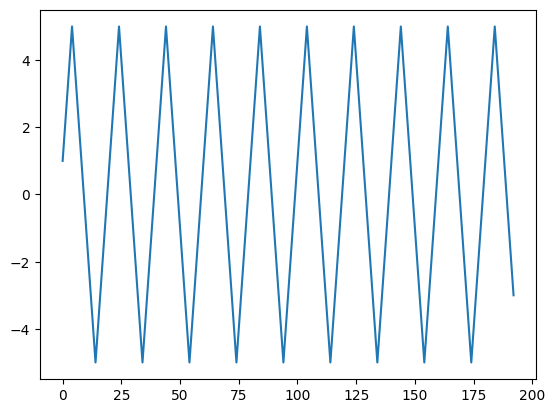

In [5]:
W 